In [1]:
from kneed import DataGenerator, KneeLocator
import tkinter
from quick_extract import *
from get_data import *
from load_rhd import *
import matplotlib.pyplot as plt
from ExtractRecordings.manual.simple_sort import*
import pandas as pd
from PostProcessing.tools.utils import *
from tonotopy import *
from matplotlib.colors import ListedColormap, Normalize
from format_data import *
from skimage import measure
import matplotlib.colors as colors
from scipy.signal import find_peaks
from extract_data_total import *
import PostProcessing.tools.utils as ut
from PostProcessing.tools.extraction import *
import re
import numpy as np
import os
import glob
import warnings
from copy import deepcopy
import json
import pickle
from functions_get_data import *
sr = 30e3
t_pre = 0.2#0.2
t_post = 0.50#0.300
bin_width = 0.005
#bin_width = 0.02
psth_bins = np.arange(-t_pre, t_post + bin_width, bin_width)
max_freq = 3
min_freq=3 #3 for A1
threshold = 4.5 #threshold for contour detection 3.2 is good

print(bin_width)
path = '/auto/data2/eTheremin/OSCYPEK/OSCYPEK/OSCYPEK_20240710_SESSION_00/headstage_0'

data = np.load(path+f'/data_{bin_width}.npy', allow_pickle=True)
features = np.load(path+f'/features_{bin_width}.npy', allow_pickle=True)

# mettre une condition si good_clusters.npy n'existe pas alors gc = 32
gc = np.arange(32)

#récupérer les tones joués
tones = get_played_frequency(features, t_pre, t_post, bin_width, 'Tonotopy')
# prendre les valeurs uniques de tones
unique_tones = sorted(np.unique(tones))
#récupérer les heatmaps
heatmaps = get_tonotopy(data, features, t_pre, t_post, bin_width, gc, unique_tones, max_freq, min_freq, 'tono', 'heatmaps')

plot_heatmap_bandwidth(heatmaps,threshold, gc,unique_tones, min_freq, max_freq, bin_width, psth_bins, t_pre,path, '', 'tono')


0.005


UnboundLocalError: local variable 'c' referenced before assignment

In [2]:
data= np.load('/mnt/working2/felicie/Python_theremin/Analyse/Analyse/Experiment/BURRATA/BURRATA_20240425_SESSION_01/headstage_1/neural_data.npy')

In [3]:
len(data)

32

In [8]:

path = '/mnt/working2/felicie/Python_theremin/Analyse/Analyse/Experiment/ALTAI/ALTAI_20240724_SESSION_01/headstage_0'

data = np.load(path+f'/data_{bin_width}.npy', allow_pickle=True)
features = np.load(path+f'/features_{bin_width}.npy', allow_pickle=True)


gc = np.arange(32)
pb_psth = get_psth(data, features, t_pre, t_post, bin_width, gc, 'playback')
tr_psth = get_psth(data, features, t_pre, t_post, bin_width, gc, 'tracking')

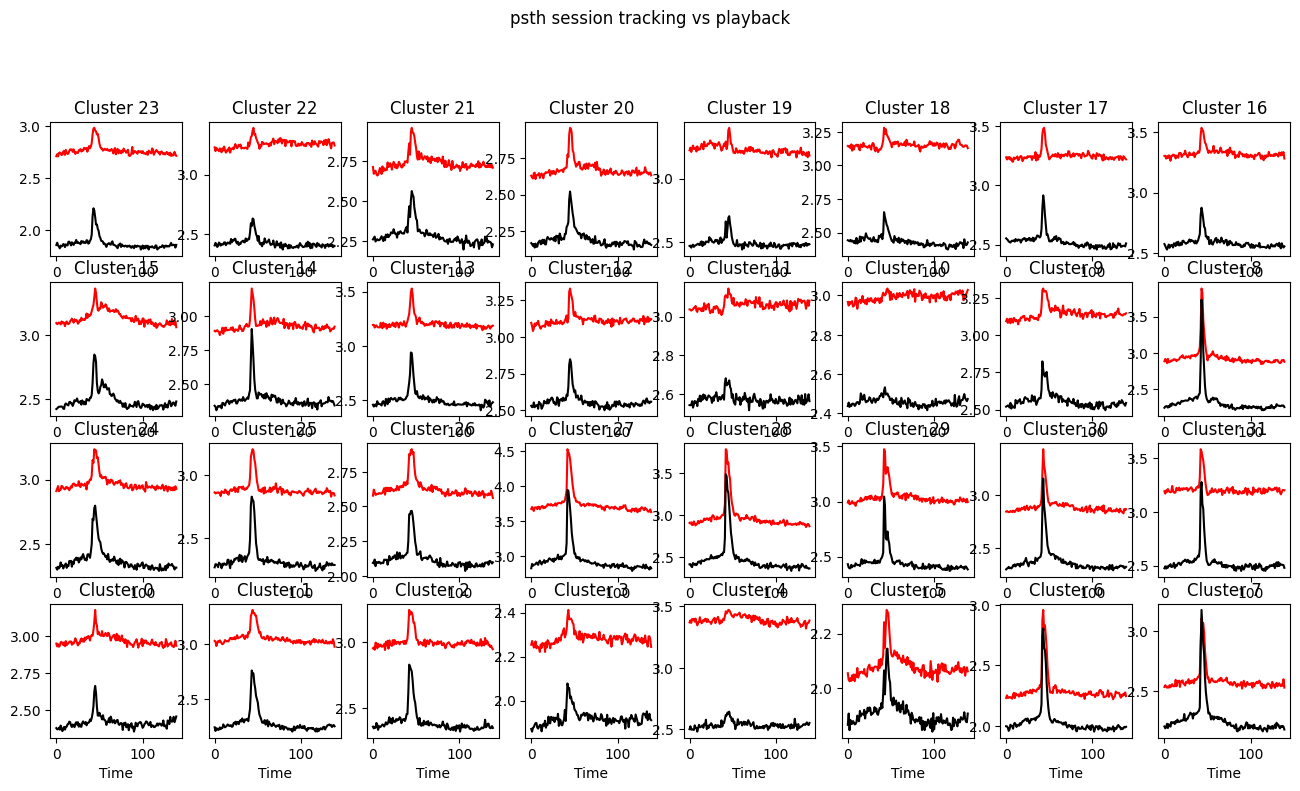

In [9]:
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)


# Create a figure with subplots
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('psth session tracking vs playback', y=1.02)
plt.subplots_adjust() 

n_psth = len(psth[0])

for cluster in range(num_plots):
    if cluster < num_plots:
        row, col = get_plot_coords(cluster)
        
        axes[row, col].plot(np.nanmean(tr_psth[cluster], axis=0), c = 'red')
        axes[row, col].plot(np.nanmean(pb_psth[cluster], axis=0), c = 'black')
        axes[row, col].set_xlabel('Time')
        #axes[row, col].set_ylabel('Frequency [Hz]')
        axes[row, col].set_title(f'Cluster {gc[cluster]}')
            
for ax in axes[num_plots:]:
    ax.axis('off')


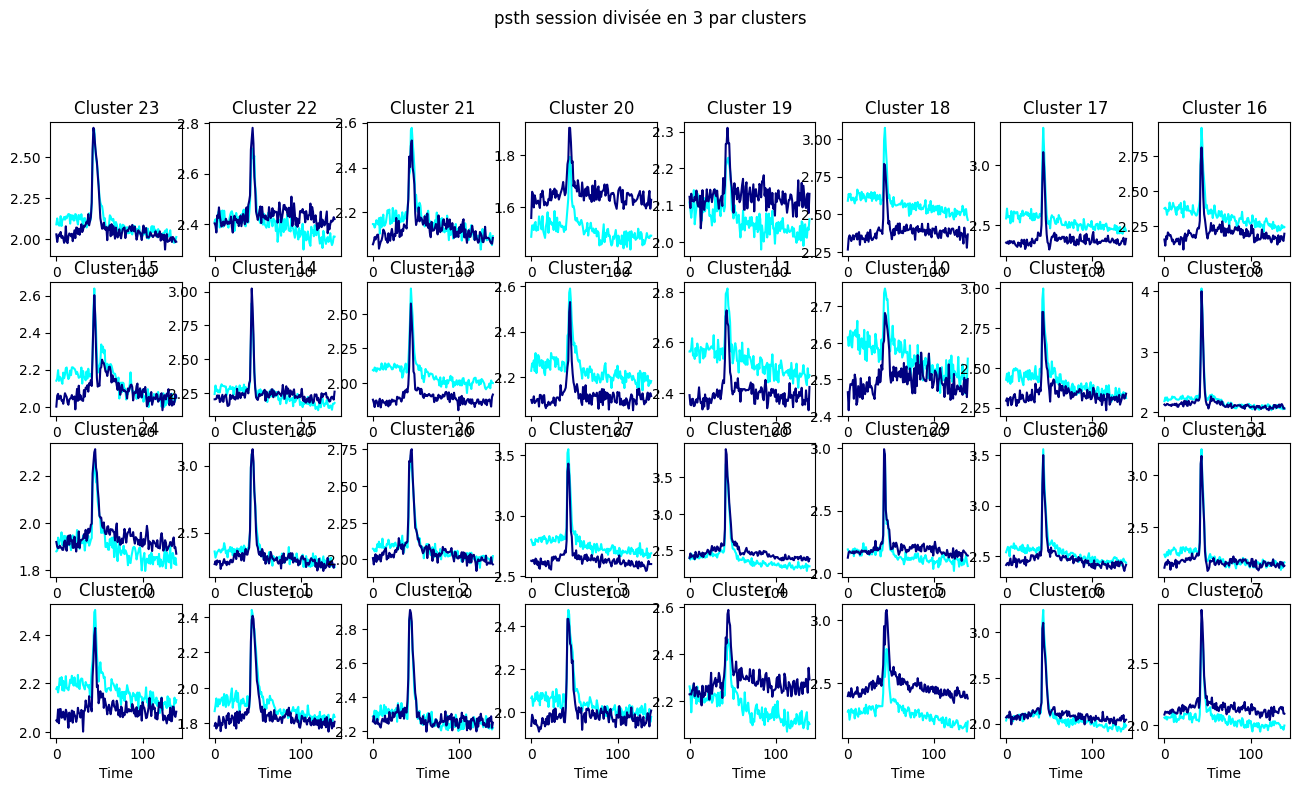

In [5]:
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)


# Create a figure with subplots
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('psth session divisée en 3 par clusters', y=1.02)
plt.subplots_adjust() 

n_psth = len(psth[0])

for cluster in range(num_plots):
    if cluster < num_plots:
        row, col = get_plot_coords(cluster)
        
        n2 = int(n_psth/2)
        
        axes[row, col].plot(np.nanmean(psth[cluster][:n2], axis=0), c = 'cyan')
        axes[row, col].plot(np.nanmean(psth[cluster][n2:], axis=0), c = 'navy')
        axes[row, col].set_xlabel('Time')
        #axes[row, col].set_ylabel('Frequency [Hz]')
        axes[row, col].set_title(f'Cluster {gc[cluster]}')
            
for ax in axes[num_plots:]:
    ax.axis('off')


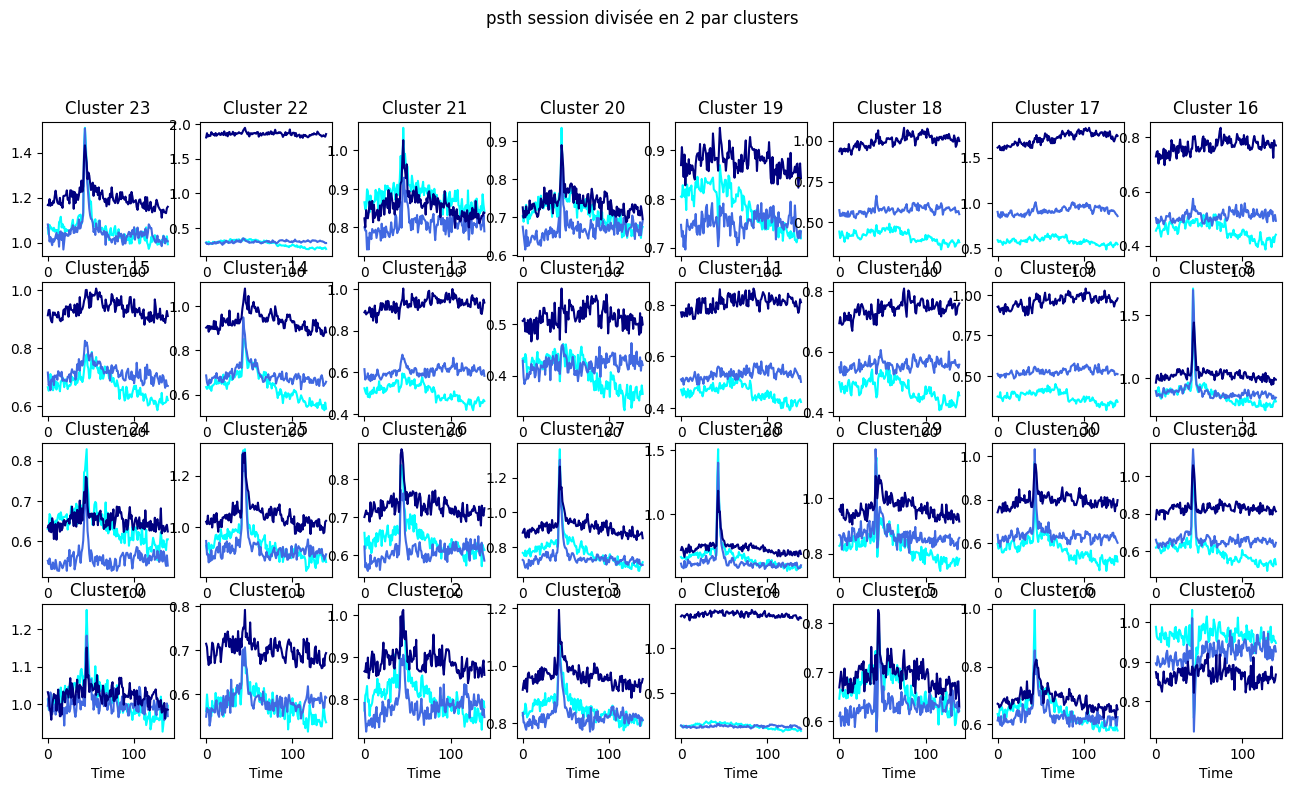

In [21]:
num_plots, num_rows, num_columns = get_better_plot_geometry(gc)


# Create a figure with subplots
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
fig.suptitle('psth session divisée en 3 par clusters', y=1.02)
plt.subplots_adjust() 

n_psth = len(psth[0])

for cluster in range(num_plots):
    if cluster < num_plots:
        row, col = get_plot_coords(cluster)
        
        n3 = int(n_psth/3)
        
        axes[row, col].plot(np.nanmean(psth[cluster][:n3], axis=0), c = 'cyan')
        axes[row, col].plot(np.nanmean(psth[cluster][n3:n3*2], axis=0), c = 'royalblue')
        axes[row, col].plot(np.nanmean(psth[cluster][n3*2:], axis=0), c = 'navy')
        axes[row, col].set_xlabel('Time')
        #axes[row, col].set_ylabel('Frequency [Hz]')
        axes[row, col].set_title(f'Cluster {gc[cluster]}')
            
for ax in axes[num_plots:]:
    ax.axis('off')


In [5]:
def get_triggers(path):
    an_triggers = np.load(os.path.join(path, "analog_in.npy"))
    an_times = ut.extract_analog_triggers_compat(an_triggers[0])
    frequencies, tones_total, triggers_spe, tag = get_data(path, trigs=an_times)
    return an_times

In [6]:
path = '/mnt/working2/felicie/Python_theremin/Analyse/Analyse/Experiment/OSCYPEK/OSCYPEK_20240708_SESSION_02/headstage_0'

In [7]:
t = get_triggers(path)

In [8]:
t

array([  388969,   411849,   434409, ..., 45103927, 45126487, 45148887])

In [14]:
#path = '/mnt/working2/felicie/Python_theremin/Analyse/Analyse/Experiment/FRINAULT/'
path = '/mnt/working2/felicie/Python_theremin/Analyse/Analyse/Experiment/MUROLS/'
folders = get_folders(path)
#
#for folder in folders:  
    #create_data(path+folder, bin_width) 

In [15]:
for folder in folders:
    
    # load data.npy, features.npy and good_clusters.npy
    data = np.load(path+folder+'/data.npy')
    features = np.load(path+folder+'/features.npy', allow_pickle=True)
    gc = np.load(path+folder+'/good_clusters_playback.npy', allow_pickle=True)  
    # load les unique_tones
    unique_tones = np.load(path+folder+'/unique_tones.npy') 
    save_name_tono = path+folder+'/heatmaps.npy'
    hm = get_tonotopy(data, features, t_pre, t_post, bin_width, gc, unique_tones, max_freq, min_freq, save_name_tono)
    heatmap = np.load(path+folder+'/heatmap.npy')

KeyboardInterrupt: 

In [17]:
folder = folders[5]
data = np.load(path+folder+'/data.npy')
features = np.load(path+folder+'/features.npy', allow_pickle=True)
gc = np.load(path+folder+'/good_clusters_playback.npy', allow_pickle=True)  
unique_tones = np.load(path+folder+'/unique_tones.npy') 
save_name_tono = path+folder+'/heatmaps.png'
#heatmap = plot_tonotopy(data, features, t_pre, t_post, bin_width, gc, unique_tones, save_name_tono)
tono_tones = unique_tones[min_freq:-max_freq]
savename_bd = path+folder+'/bandwidth'
get_bandwidth(heatmap, psth_bins, unique_tones, min_freq, max_freq, savename_bd)
#bandwidth = np.load(path+folder+'/bandwidth')
heatmap = np.load(path+folder+'/heatmaps.npy')

<Axes: >

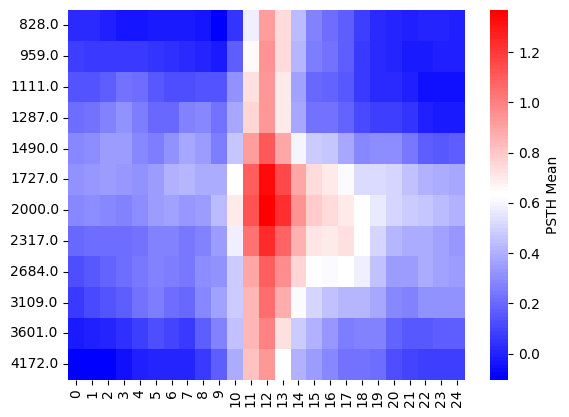

In [19]:
#je vais refaire mes psth avec seulement les bandwidth
smooth_heatmap = smooth_2d(heatmap[0], 3)
sns.heatmap(smooth_heatmap, cmap=create_colormap(), yticklabels=unique_tones[min_freq:-max_freq],
                    cbar_kws={'label': 'PSTH Mean'})

In [20]:
detect_peak_and_contours(heatmap, 0, psth_bins, tono_tones, contour_std=2)


([13, 6], [0.01999999999999988, 0.07999999999999985], [1287.0, 3601.0])